<a href="https://colab.research.google.com/github/ashkan-azzad/Ml_code/blob/main/CryptoETH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import requests
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [ ]:
response = requests.get('https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=CAD&limit=1000')
json.loads(response.content)['Data']

In [ ]:
df = pd.DataFrame(json.loads(response.content)['Data'])
df.head()

In [ ]:
df = df.set_index('time')

In [ ]:
df = df[['high', 'low', 'open', 'volumefrom', 'volumeto', 'close']]
df.head()

In [ ]:
def train_test_split(df):
    split_row = len(df) - int(0.2 * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data
train, test = train_test_split(df)

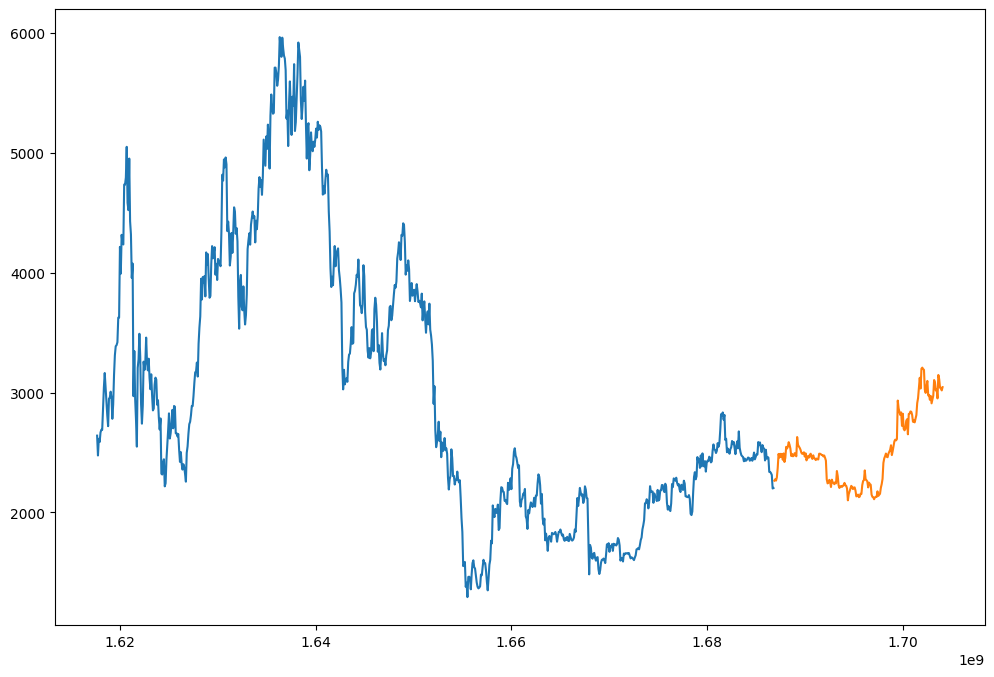

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(train['close'], label='train_data')
ax.plot(test['close'], label='test_data')

In [ ]:
def norm_zero_base(df):
    return df / df.iloc[0] - 1

In [ ]:
sample = norm_zero_base(df['close'])
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(sample, label='sample')

In [ ]:
def norm_min_max(df):
    return (df - df.min()) / (df.max() - df.min())

In [ ]:
sample = norm_min_max(df['close'])
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(sample, label='sample')

In [ ]:
def extract_windows_data(df):
    window_data = []
    for idx in range(len(df) - 10):
        tmp = df[idx: (idx + 10)].copy()
        tmp = norm_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [ ]:
def prepare_data(df):
    train_data, test_data = train_test_split(df)
    X_train = extract_windows_data(train_data)
    X_test = extract_windows_data(test_data)
    y_train = train_data['close'][10:].values
    y_test = test_data['close'][10:].values

    y_train = y_train / train_data['close'][:-10].values - 1
    y_test = y_test / test_data['close'][:-10].values - 1
    return train_data, test_data, X_train, X_test, y_train, y_test

In [ ]:
train, test, X_train, X_test, y_train, y_test = prepare_data(df)

In [32]:
model = Sequential()
model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.add(Activation('relu'))

model.compile(loss='mse', optimizer='adam')

In [33]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, shuffle=True, verbose=1)

Epoch 1/200
25/25 [==============================] - 3s 20ms/step - loss: 0.0129
Epoch 2/200
25/25 [==============================] - 0s 19ms/step - loss: 0.0120
Epoch 3/200
25/25 [==============================] - 0s 20ms/step - loss: 0.0113
Epoch 4/200
25/25 [==============================] - 0s 20ms/step - loss: 0.0105
Epoch 5/200
25/25 [==============================] - 0s 19ms/step - loss: 0.0104
Epoch 6/200
25/25 [==============================] - 0s 20ms/step - loss: 0.0104
Epoch 7/200
25/25 [==============================] - 1s 20ms/step - loss: 0.0103
Epoch 8/200
25/25 [==============================] - 0s 19ms/step - loss: 0.0102
Epoch 9/200
25/25 [==============================] - 0s 19ms/step - loss: 0.0104
Epoch 10/200
25/25 [==============================] - 0s 19ms/step - loss: 0.0103
Epoch 11/200
25/25 [==============================] - 0s 19ms/step - loss: 0.0101
Epoch 12/200
25/25 [==============================] - 0s 19ms/step - loss: 0.0101
Epoch 13/200
25/25 [=====

In [34]:
targets = test['close'][10:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

6/6 [==============================] - 0s 7ms/step


0.026387982825587686

In [35]:
preds

array([8.73548537e-02, 6.21395260e-02, 7.98042417e-02, 4.49759141e-02,
       2.43117251e-02, 7.83641636e-03, 3.33642848e-02, 1.29913986e-02,
       5.50978743e-02, 2.37322375e-02, 2.96021253e-02, 0.00000000e+00,
       1.89144276e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.13468874e-02, 4.44104075e-02,
       2.86200643e-02, 1.35710165e-02, 9.87873971e-03, 3.77381593e-03,
       0.00000000e+00, 0.00000000e+00, 7.63658434e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.13382393e-03, 3.01210582e-03, 9.72334296e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.76032260e-02, 1.69522017e-02, 0.00000000e+00, 0.00000000e+00,
       4.58586961e-03, 6.88450038e-03, 1.52759925e-02, 1.68054551e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [36]:
targets[:10] * (preds[:10] + 1)

time
1687737600    2652.591401
1687824000    2646.947254
1687910400    2614.465078
1687996800    2565.593423
1688083200    2609.301101
1688169600    2552.748972
1688256000    2633.012226
1688342400    2619.747782
1688428800    2706.062130
1688515200    2593.256948
Name: close, dtype: float64

In [37]:
len(train[-10:]) * (preds[:10] + 1)

array([10.8735485, 10.621395 , 10.798042 , 10.449759 , 10.243118 ,
       10.078364 , 10.333643 , 10.129914 , 10.550978 , 10.237322 ],
      dtype=float32)

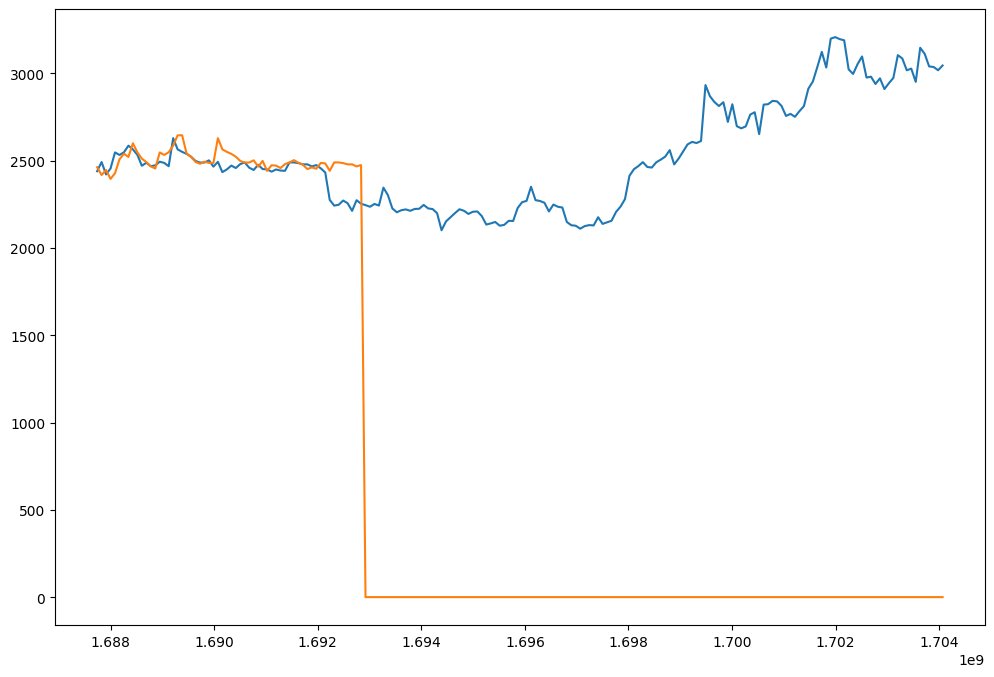

In [38]:
preds_plt = preds.copy()
preds_plt[:60] = test['close'].iloc[:60].values * (preds_plt[:60] + 1)
preds_plt = pd.Series(index=targets.index, data=preds_plt)
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(targets, label='target')
ax.plot(preds_plt, label='predics')